[[ 0.61255217  0.52624317]
 [ 0.13383515  0.07553705]
 [ 0.27500627  0.79678963]
 [ 0.98189468  0.99035488]
 [ 0.17600633  0.07841459]]


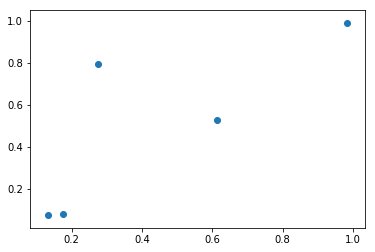

In [3]:
import numpy as np
import matplotlib.pyplot as plt

points = np.random.rand(5, 2)
print(points)
plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [6]:
dist = []
for p in points:
    temp = []
    for q in points:
        diff = (p-q)
        temp.append(np.sqrt(diff.T.dot(diff)))
    dist.append(temp)
dist = np.array(dist)     
print(dist)

[[ 0.          0.6574998   0.43258828  0.59313874  0.62539804]
 [ 0.6574998   0.          0.73493848  1.24743602  0.04226924]
 [ 0.43258828  0.73493848  0.          0.73291113  0.7251646 ]
 [ 0.59313874  1.24743602  0.73291113  0.          1.21700087]
 [ 0.62539804  0.04226924  0.7251646   1.21700087  0.        ]]


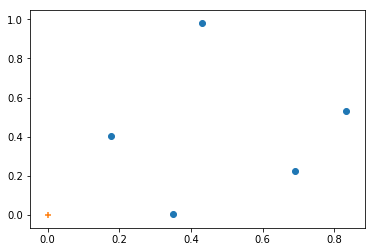

-1.76711259226


In [54]:
pred = np.random.rand(5,2)
plt.scatter(pred[:,0], pred[:,1])
plt.scatter([0], [0], marker="+")
plt.show()
temp_dist = []
for p in pred:
    temp = []
    for q in pred:
        diff = (p-q)
        temp.append(np.sqrt(diff.T.dot(diff)))
    temp_dist.append(temp)
temp_dist = np.array(temp_dist)
print(np.sum(temp_dist - dist))

-1.76711259226
-1.30028433011
-1.01831348296
-0.834567861521
-0.708515945646
-0.618738533059
-0.552938767588
-0.503612573419
-0.465958223494
-0.436783345629
-0.413897223712
-0.395755903463
-0.381246351702
-0.369550573232
-0.360057446546
-0.352303965193
-0.345935120664
-0.340675910178
-0.33631141909
-0.332672399335
-0.329624665018
-0.327061188664
-0.324896140542
-0.323060347236
-0.321497800779
-0.320162954635
-0.319018615081
-0.318034287158
-0.317184870389
-0.316449625431
-0.31581135188
-0.315255731472
-0.314770801474
-0.314346530986
-0.313974478884
-0.313647516797
-0.313359604027
-0.313105604118
-0.312881134902
-0.31268244553
-0.312506315335
-0.312349970389
-0.312211014441
-0.312087371592
-0.311977238551
-0.311879044754
-0.311791418938
-0.311713161043
-0.311643218514
-0.311580666249
-0.311524689581
-0.31147456979
-0.311429671728
-0.311389433215
-0.311353355933
-0.311320997574
-0.31129196506
-0.31126590866
-0.311242516889
-0.311221512051
-0.311202646364
-0.311185698552
-0.311170470872
-

-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.311034501195
-0.31103

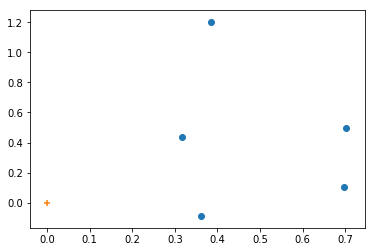

In [55]:

lr = 0.09
gamma = 0.9

for _ in range(1000):
    lr *= gamma
    temp_dist = []
    for p in pred:
        temp = []
        for q in pred:
            diff = (p-q)
            temp.append(np.sqrt(diff.T.dot(diff)))
        temp_dist.append(temp)
    temp_dist = np.array(temp_dist)
    print(np.sum(temp_dist - dist))
    
    for i, p in enumerate(pred):
        move = np.zeros(2)
        for j, q in enumerate(pred):
            diff = (q - p)
            if diff.T.dot(diff) == 0:
                continue
            move += (temp_dist[i][j] - dist[i][j]) * diff / diff.T.dot(diff)
        pred[i] += lr * move / 2

plt.scatter(pred[:, 0], pred[:, 1])
plt.scatter([0], [0], marker="+")
plt.show()

In [87]:


def grad(x):
    res = np.zeros(x.shape)
    for i, p in enumerate(x):
        diff = np.array([p]*x.shape[0]) - x
        res[i] = np.sum(np.array([(diff.dot(diff.T).diagonal() * dist[i])[j] * v for j, v in enumerate(diff)]), axis=0)
    return res

# print(grad(pred))
new_pred = np.random.rand(5, 2)
lr = 0.001
gamma = 0.9
for _ in range(10000):
    new_pred -= lr * grad(new_pred)
    lr *= gamma
print(new_pred - points)

[[-0.51359482  0.06623085]
 [ 0.0912076   0.20780365]
 [ 0.56429286  0.07051884]
 [-0.78972075 -0.3705151 ]
 [ 0.05101379  0.59353002]]


In [44]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[3, 4], [5, 6]])
d = np.array([[0, 2], [2, 0]])
print(a.dot(a.T).diagonal() * d[0])
t = a.dot(a.T).diagonal() * a
print(a.dot(a.T).diagonal() * a)
print(np.sum(t, axis=0))
print(a[1].T.dot(a[1]))

[ 5 25]
[[  5  50]
 [ 15 100]]
[ 20 150]
25
